In [13]:
from data import load_data, GS_Dataset, make_gs_dataset, GS_Results, convert_to_narx
from model import Narx, DEVICE
from util_fun import train_narx, narx_sim_nrms, calculate_error_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
n_a = 3
n_b = 15
n_layers = 1
n_nodes = 100
n_epochs = 15_000

In [15]:
model = Narx(n_a + n_b, n_nodes, n_layers).to(DEVICE)

In [16]:
x_data, y_data = load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [17]:
results: GS_Results = train_narx(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 1.0047262011611915, previous best pred NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.026438949230655012, previous best pred NRMS: 1.0047262011611915 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.020847206689082395, previous best pred NRMS: 0.026438949230655012 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.018717076850569725, previous best pred NRMS: 0.020847206689082395 

Checkpoint at epoch 2401:  

current best pred NRMS: 0.017421618803404808, previous best pred NRMS: 0.018717076850569725 

Checkpoint at epoch 3001:  

current best pred NRMS: 0.016257491335638106, previous best pred NRMS: 0.017421618803404808 

Checkpoint at epoch 3601:  

current best pred NRMS: 0.01481549357565002, previous best pred NRMS: 0.016257491335638106 

Checkpoint at epoch 4201:  

current best pred NRMS: 0.013835872661946814, previous best pred NRMS: 0.01481549357565002 

Checkpoint at epoch 4801:  

current best p

In [18]:
torch.save(
    results.best_model.state_dict(),
    f"narx{n_epochs//1000}K_na{n_a}_nb{n_b}_nlay{n_layers}_nnode{n_nodes}_pred",
)

In [19]:
train_nrms=calculate_error_nrms(results.best_model(data.x_train),data.y_train)
test_nrms=calculate_error_nrms(results.best_model(data.x_test),data.y_test)
val_nrms=calculate_error_nrms(results.best_model(data.x_val),data.y_val)
x_all, y_all=convert_to_narx(x_data, y_data, n_a, n_b)
y_data_pred=results.best_model(x_all.to(DEVICE))

In [20]:
f'train nrms: {train_nrms:.2%}, val nrms: {val_nrms:.2%}, test nrms: {test_nrms:.2%}'

'train nrms: 0.86%, val nrms: 0.84%, test nrms: 2.15%'

Text(0, 0.5, 'Angle [rad]')

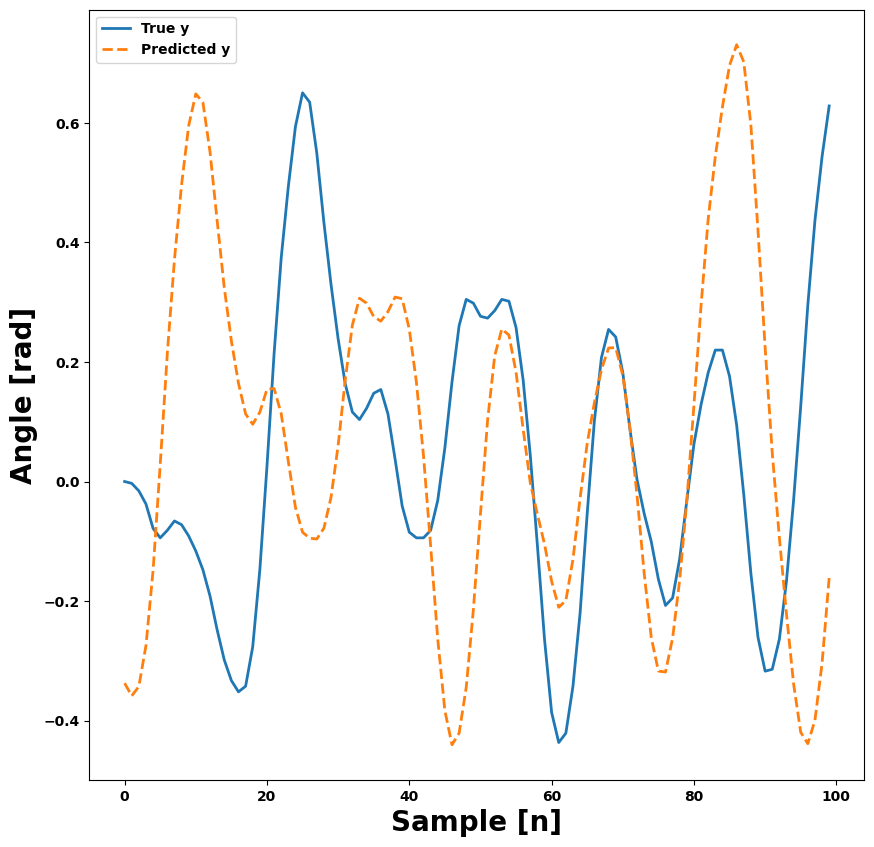

In [21]:
start = 0
end = 100
fs = 20
plt.figure(figsize=(10, 10))
plt.plot(y_data.detach().cpu()[start:end], label="True y", lw=2)
plt.plot(y_data_pred.detach().cpu()[start:end], label="Predicted y", ls="--", lw=2)
plt.legend()
plt.xlabel("Sample [n]", fontsize=fs)
plt.ylabel("Angle [rad]", fontsize=fs)